In [6]:
import pandas as pd

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
import numpy as np

In [9]:
pd.__version__

'1.5.3'

In [10]:
jan_url = r"https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
feb_url = r"https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

In [11]:
df = pd.read_parquet(jan_url)

In [12]:
print("Q1: number of columns", len(df.columns))

Q1: number of columns 19


In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [14]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [15]:
df['duration'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [16]:
print("Q2: duration std: ", round(df['duration'].describe()["std"],2))

Q2: duration std:  42.59


Q3

In [17]:
print("No of records: ", len(df))

No of records:  3066766


/tmp/ipykernel_32637/3440038802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["duration"], label='duration')


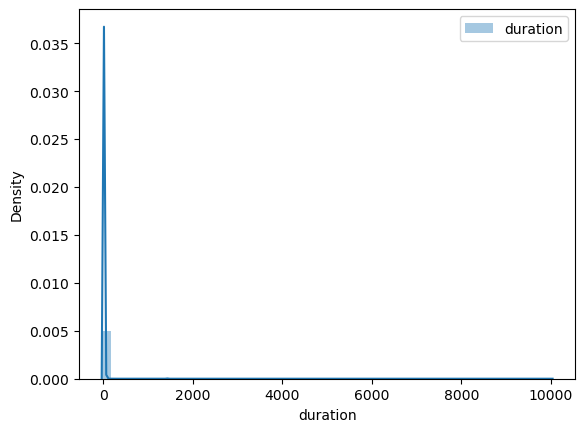

In [18]:
sns.distplot(df["duration"], label='duration')

plt.legend()

In [19]:
df["duration"].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [20]:
df_new = df[(df.duration >= 1) & (df.duration <= 60)]

In [21]:
print("Percentage of records left: ", round(len(df_new)/len(df)* 100))

Percentage of records left:  98


In [22]:
df_new.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [27]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['duration']

df[categorical] = df[categorical].astype(str)

In [28]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [30]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

np.sqrt(mean_squared_error(y_train, y_pred))

2.079870894991093e-05

In [36]:
print("length of feature matrix ", len(dv.get_feature_names_out()))

length of feature matrix  516


In [32]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>